In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

df = pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Makine_Ogrenmesi_Dersleri/master/4.regresyon/ml_4b_lojistik_regresyon/data/adult.csv')
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
              'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
              'native-country', 'salary']
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
X = df.drop(['salary'], axis=1)
y = df['salary']
print('Salary Distribution:')
print(y.value_counts())
y = np.where(df['salary'] == ' <=50K',0,1)

Salary Distribution:
 <=50K    24720
 >50K      7841
Name: salary, dtype: int64


In [3]:
categorical_columns = [c for c in X.columns  if X[c].dtype.name == 'object']
for c in categorical_columns:
  X[c] = np.where(X[c] == ' ?', X[c].mode(), df[c])
X.select_dtypes(include='object').tail(20)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32541,Private,HS-grad,Separated,Prof-specialty,Not-in-family,Black,Female,United-States
32542,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
32543,Local-gov,Assoc-acdm,Divorced,Prof-specialty,Unmarried,White,Female,United-States
32544,Private,Masters,Divorced,Other-service,Not-in-family,Other,Female,United-States
32545,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States
32546,Private,Assoc-acdm,Divorced,Tech-support,Not-in-family,White,Female,United-States
32547,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Mexico
32548,Self-emp-not-inc,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
32549,State-gov,Some-college,Divorced,Adm-clerical,Other-relative,White,Female,United-States
32550,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


In [4]:
X = pd.concat([X, pd.get_dummies(X.select_dtypes(include='object'))], axis=1)
X = X.drop(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'], axis=1)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

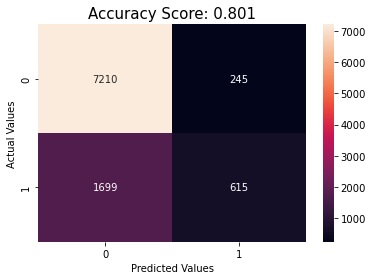

In [6]:
predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      7455
        >50K       0.72      0.27      0.39      2314

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.79      0.80      0.76      9769



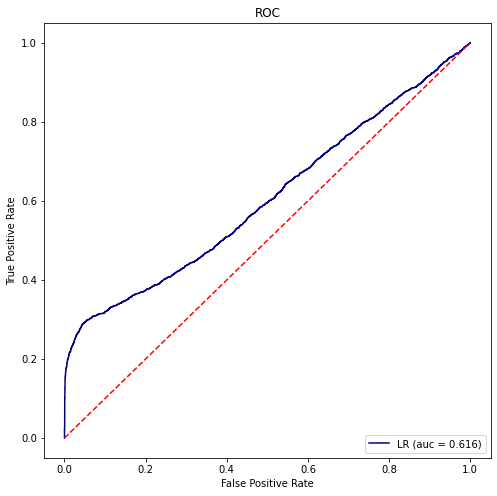

In [8]:
plt.figure(figsize=(8,8))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='LR (auc = %0.3f)' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [10]:
from sklearn.feature_selection import RFE

rfe = RFE(lr, 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.ranking_)
X_train[X_train.columns[rfe.ranking_==1].values].head()

[47 52 21 51 50 45 10 59 85 40 11 25 96 76 34 26 29 42 32 35 33 20 30 46
  1 28 23 57  1 31 15 87  1 16 13 14 17 36 89 41  4  1  1  5  1  1 48 19
 24 12 39 27 43  1  1 38  7  9 22 37  6 44  8 18 94 93 61 55 70 53 66 54
 80 62 82 74 56 65 91 88 77 83 63 90 86 67 64 69 84  1 79 75 68 72 73 60
  3 95 58 71 92 78 49  2 81]


,education_ Doctorate,education_ Prof-school,marital-status_ Married-civ-spouse,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Other-service,occupation_ Priv-house-serv,relationship_ Other-relative,relationship_ Own-child,native-country_ Mexico
19749,0,0,1,1,0,0,0,0,0,0
1216,0,0,1,0,0,0,0,0,0,0
27962,0,0,1,0,0,0,0,0,0,0
23077,0,0,0,0,0,0,0,0,0,0
10180,0,0,0,0,0,0,1,0,1,0


In [11]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_model=sm.Logit(y_train, X_train[X_train.columns[rfe.ranking_==1].values])
result=logit_model.fit()
predictions= result.predict(X_test[X_test.columns[rfe.ranking_==1].values])
print(classification_report(y_test, predictions.round(), target_names=['<=50K', '>50K']))
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.521546
         Iterations 9
              precision    recall  f1-score   support

       <=50K       0.78      0.99      0.87      7455
        >50K       0.75      0.09      0.16      2314

    accuracy                           0.78      9769
   macro avg       0.76      0.54      0.52      9769
weighted avg       0.77      0.78      0.70      9769

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22782
Method:                           MLE   Df Model:                            9
Date:                Sat, 12 Aug 2023   Pseudo R-squ.:                 0.05848
Time:                        15:19:02   Log-Likelihood:                -11887.
converged:                       True   LL-Null:                       -12625.
Covariance Type:  